In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')

Date                 0
Location             0
MinTemp           1157
MaxTemp           1081
Rainfall          2750
Evaporation      29430
Sunshine         32190
WindGustDir       5487
WindGustSpeed     5445
WindDir9am        4751
WindDir3pm        2288
WindSpeed9am      1050
WindSpeed3pm      1693
Humidity9am       1764
Humidity3pm       2633
Pressure9am       7271
Pressure3pm       7260
Cloud9am         25718
Cloud3pm         26950
Temp9am           1332
Temp3pm           2210
RainToday         2750
RainTomorrow      3267
dtype: int64


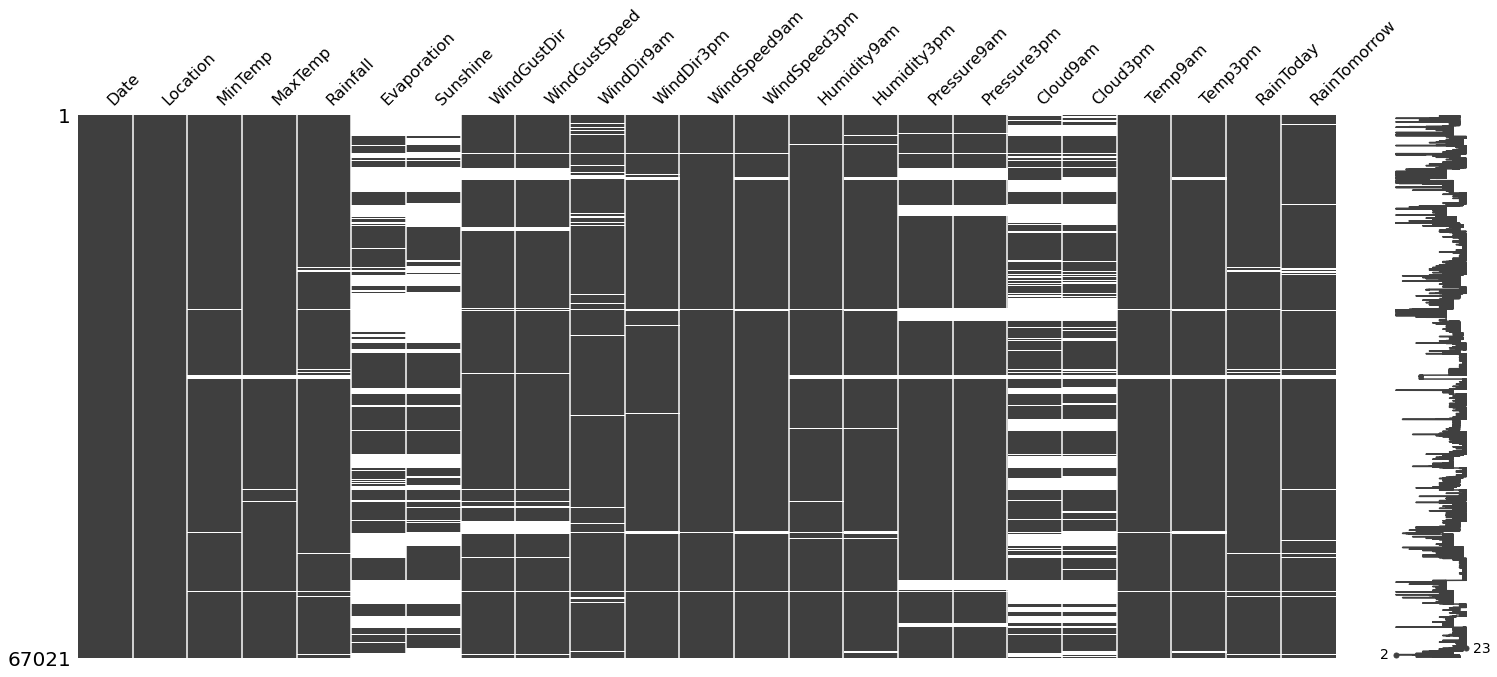

In [4]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

print(rain_data.isnull().sum())

In [5]:
# Delete the rows that have missing values in 'Evaporation' and 'Sunshine'
rain_data.dropna(subset=['Evaporation', 'Sunshine'], inplace=True)

# Delete the rows that have missing values in more than one of the following columns:
# 'WindGustDir', 'WindGustSpeed', 'Cloud9am', and 'Cloud3pm'.
# To keep a row, at least 3 of these columns must have non-null values, thus thresh=3


<AxesSubplot:>

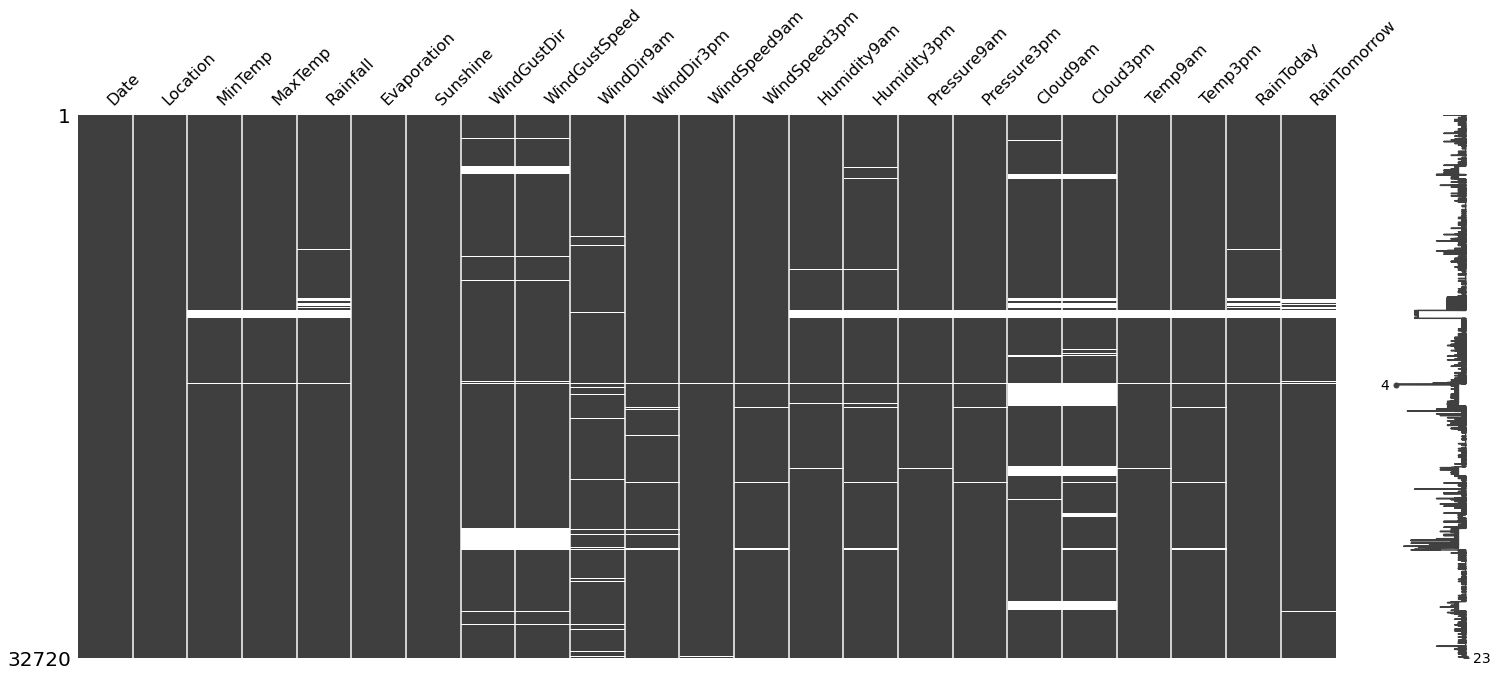

In [6]:
msno.matrix(rain_data)

In [7]:
rain_data.dropna(subset=['WindGustDir', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm'], thresh=3, inplace=True)


<AxesSubplot:>

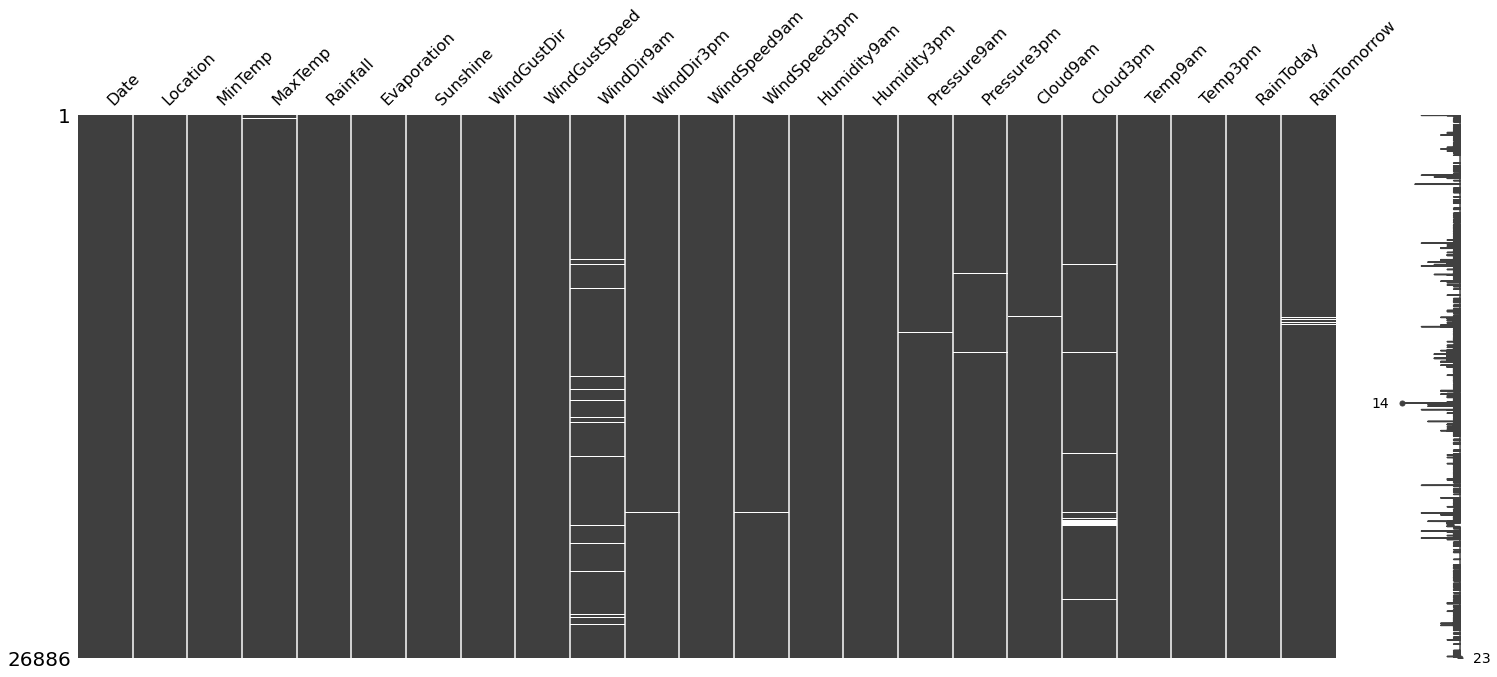

In [8]:
msno.matrix(rain_data)

In [9]:
print(rain_data.isnull().sum())

Date               0
Location           0
MinTemp           16
MaxTemp            5
Rainfall          31
Evaporation        0
Sunshine           0
WindGustDir       11
WindGustSpeed      0
WindDir9am       670
WindDir3pm       115
WindSpeed9am      31
WindSpeed3pm      21
Humidity9am       73
Humidity3pm       46
Pressure9am       40
Pressure3pm       42
Cloud9am         109
Cloud3pm         569
Temp9am           46
Temp3pm           26
RainToday         31
RainTomorrow     171
dtype: int64


In [10]:
rain_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [11]:
rain_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [12]:
variable_stats = rain_data.describe().transpose()
variable_stats


,count,mean,std,min,25%,50%,75%,max
MinTemp,26870.0,13.592776,6.495926,-6.7,8.6,13.2,18.6,31.4
MaxTemp,26881.0,23.356546,6.967090,7.0,17.8,22.8,28.8,46.8
Rainfall,26855.0,3.242823,8.883776,0.0,0.0,0.0,2.0,206.2
Evaporation,26886.0,5.100484,3.476337,0.0,2.6,4.4,7.0,60.2
Sunshine,26886.0,6.582716,3.939358,0.0,3.2,7.0,10.0,14.5
WindGustSpeed,26886.0,42.608160,14.473536,11.0,33.0,41.0,50.0,135.0
WindSpeed9am,26855.0,15.750698,8.910280,0.0,9.0,15.0,20.0,67.0
WindSpeed3pm,26865.0,20.093281,8.898810,0.0,13.0,19.0,26.0,76.0
Humidity9am,26813.0,69.559020,18.189061,0.0,59.0,71.0,83.0,100.0
Humidity3pm,26840.0,55.704396,21.237115,0.0,41.0,56.0,71.0,100.0


In [13]:
#information about categorical variables including RainToday and RainTomorrow

rain_data.select_dtypes(include='object').nunique()

Date           3281
Location         26
WindGustDir      16
WindDir9am       16
WindDir3pm       16
dtype: int64

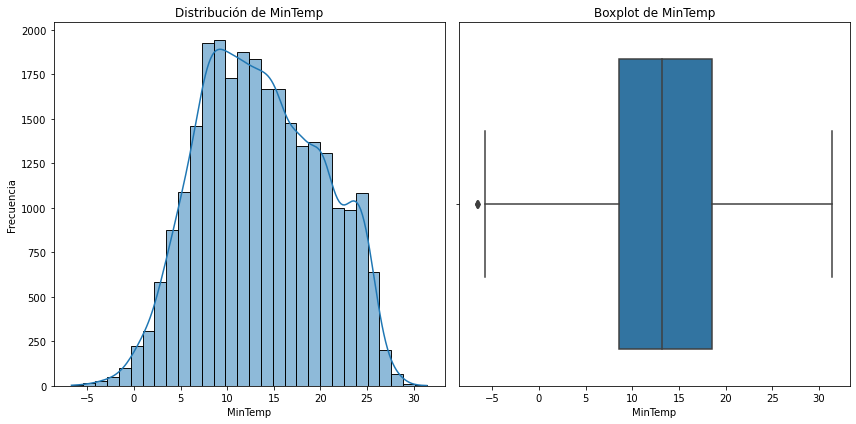

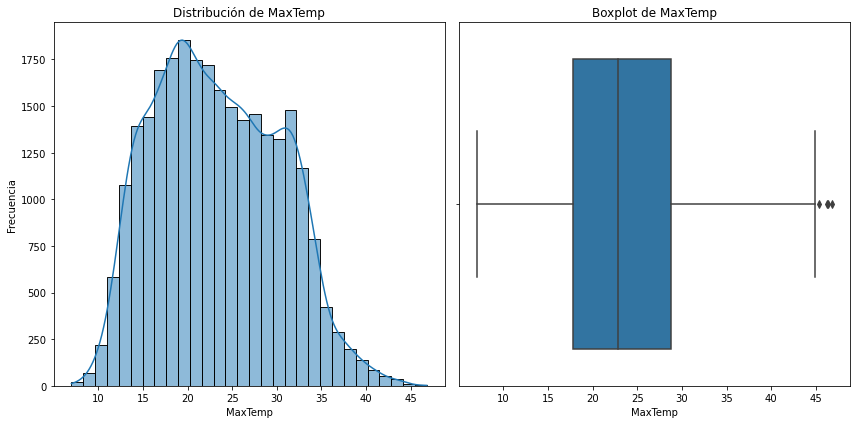

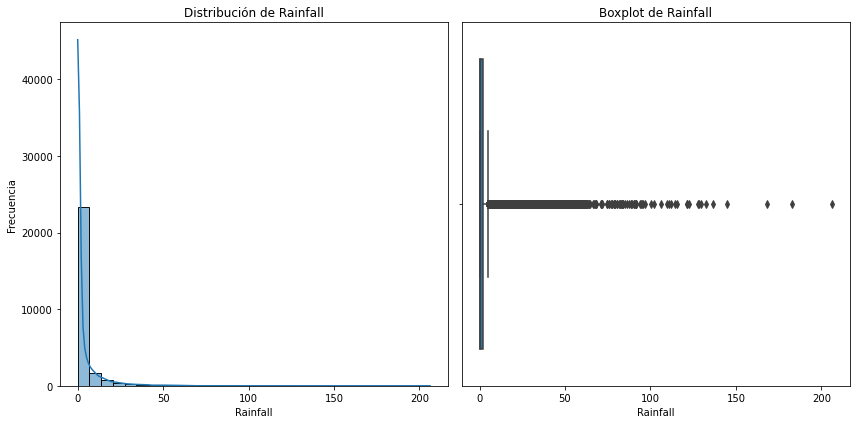

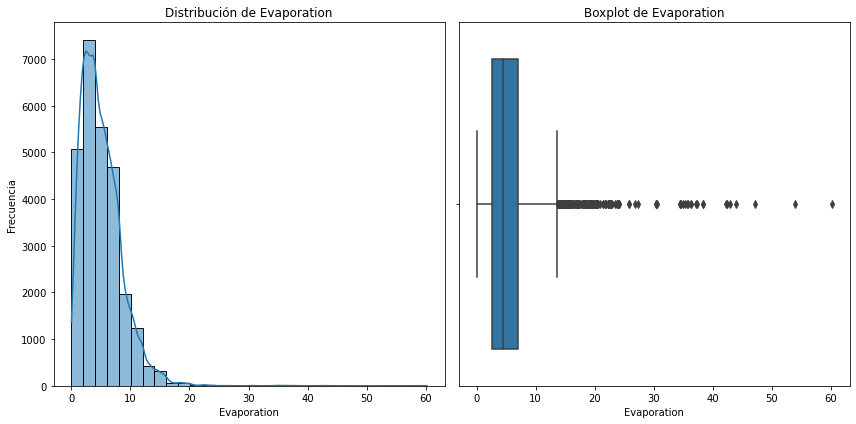

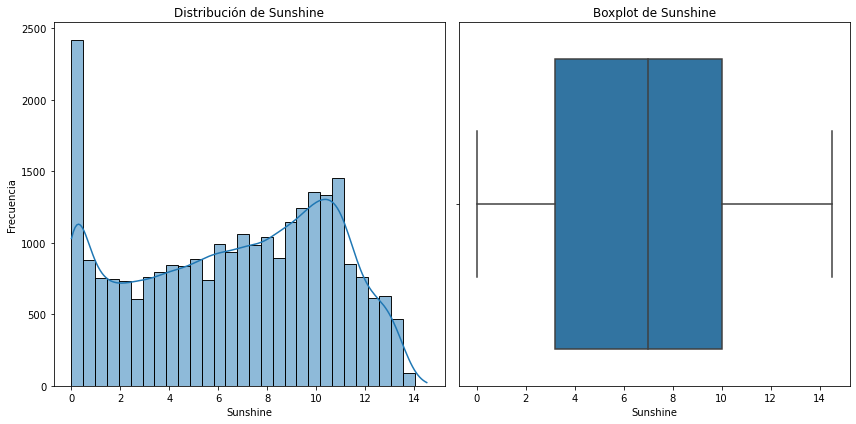

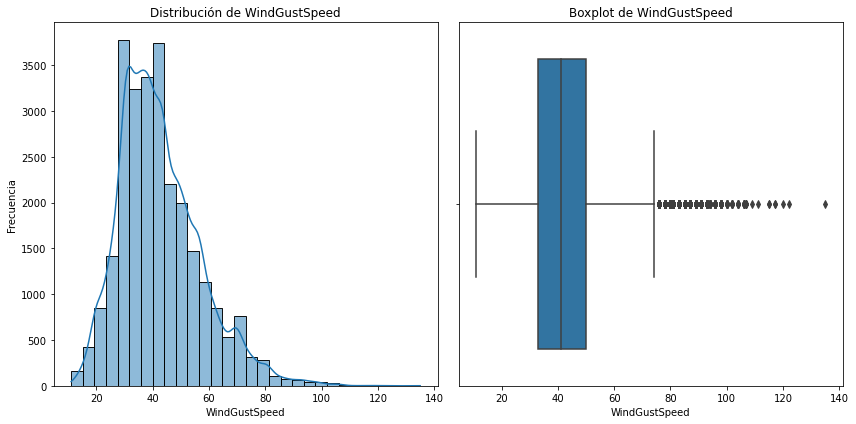

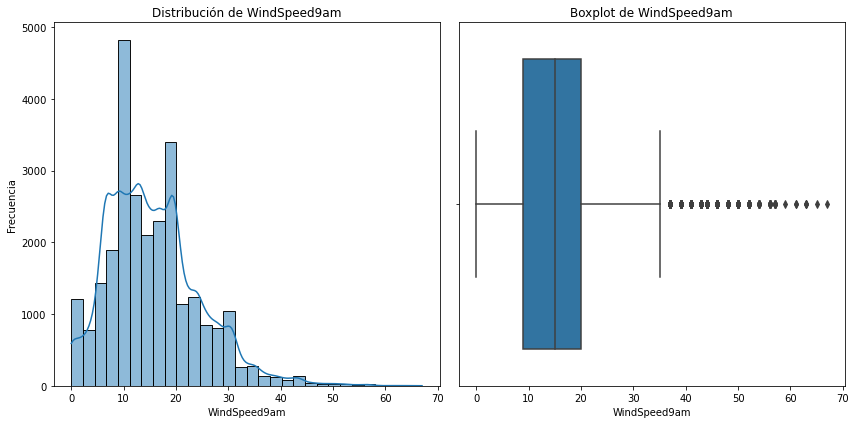

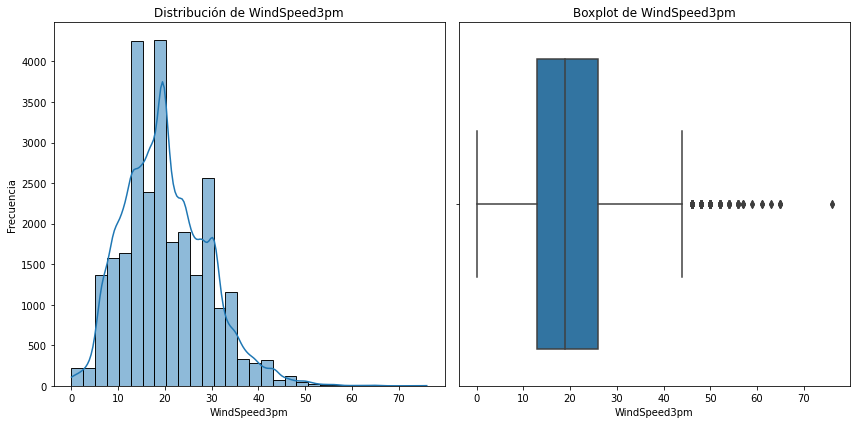

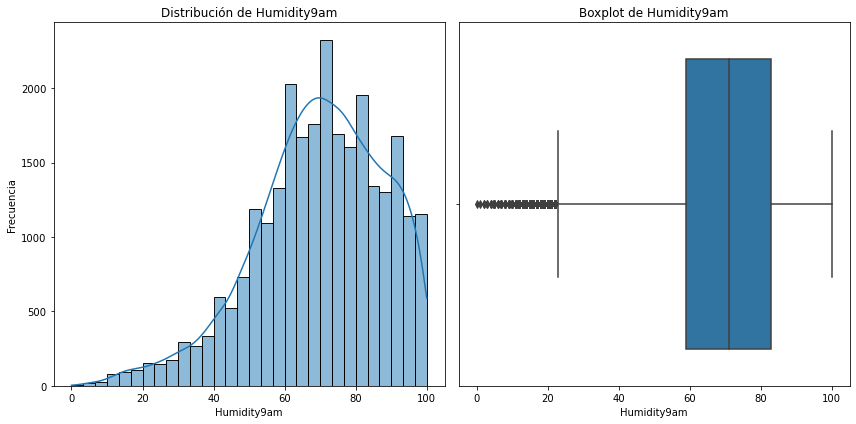

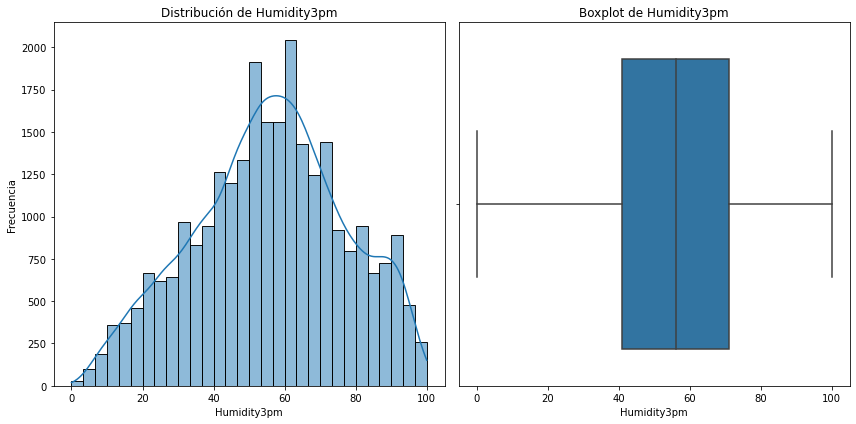

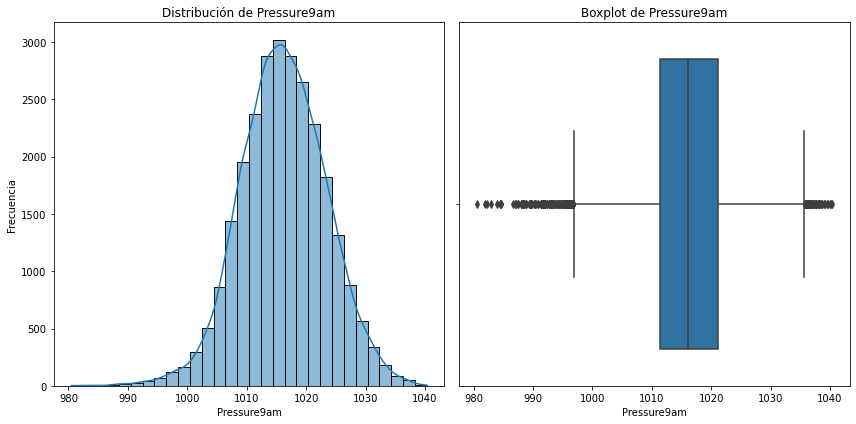

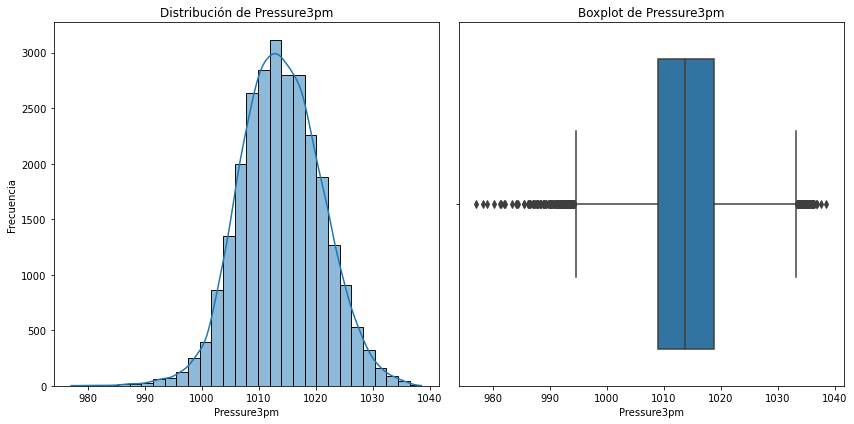

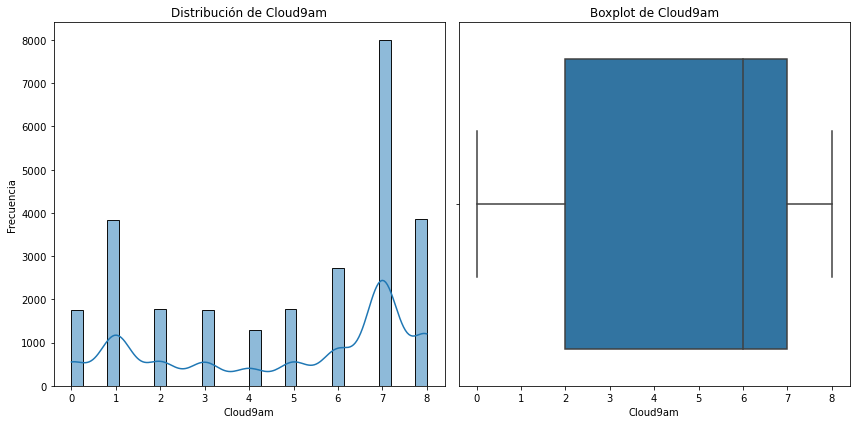

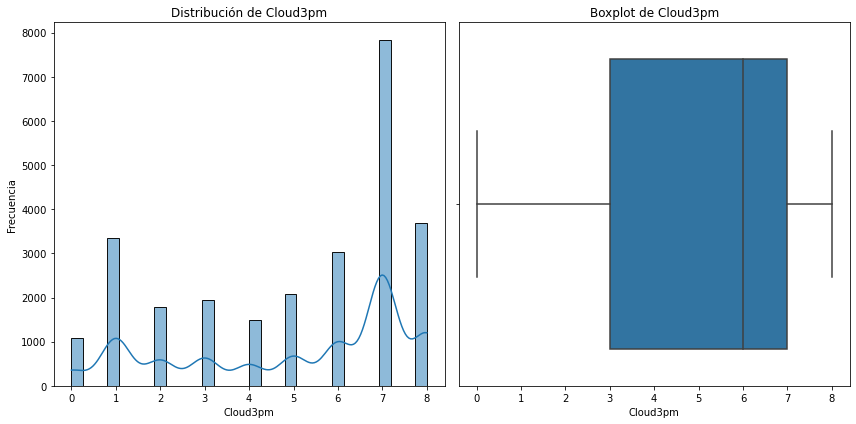

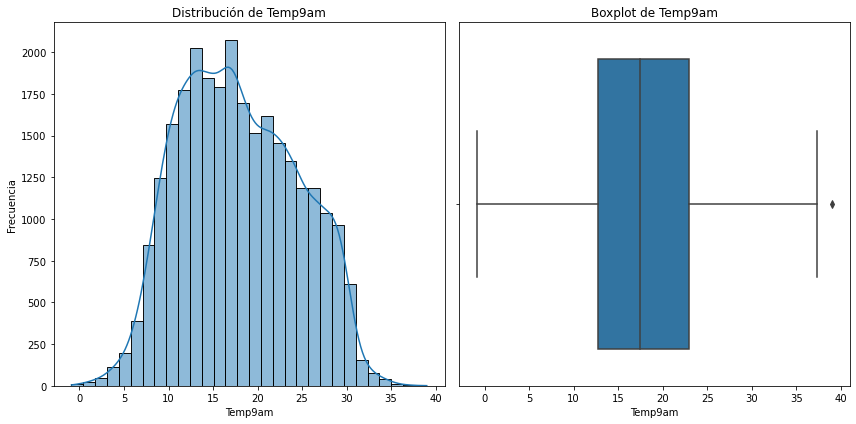

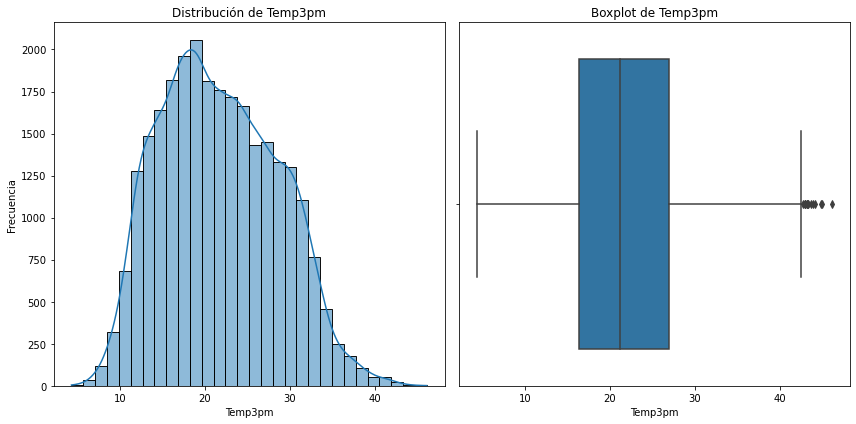

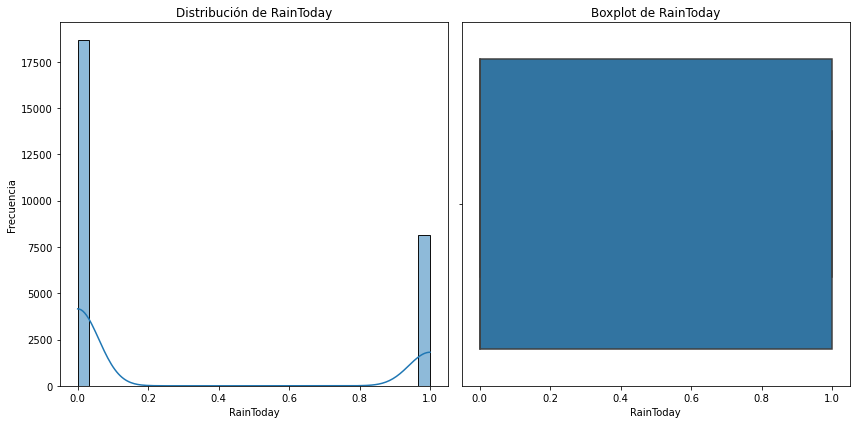

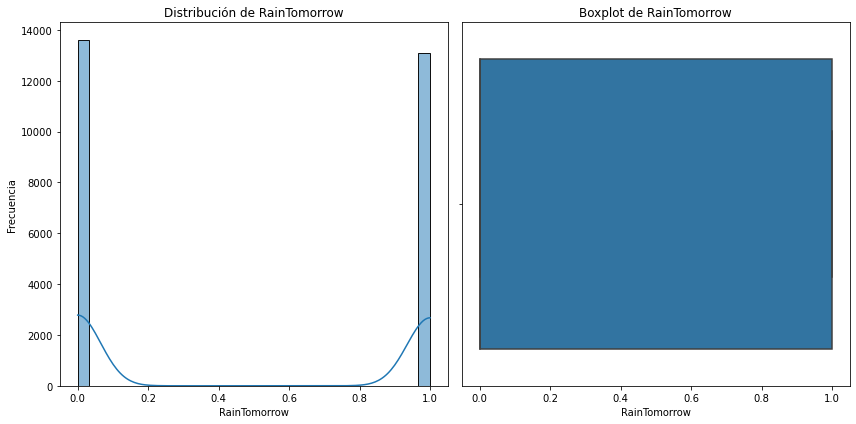

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos numéricos
numeric_columns = rain_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(rain_data[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=rain_data[column])
    plt.title(f'Boxplot de {column}')

    plt.tight_layout()
    plt.show()


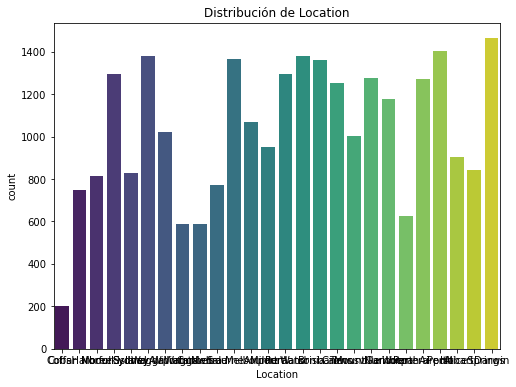

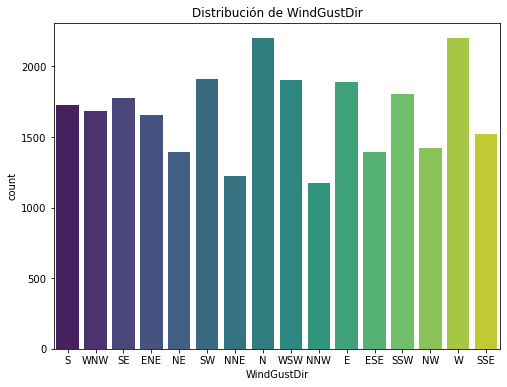

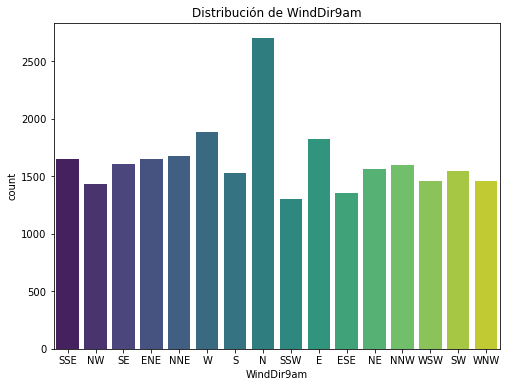

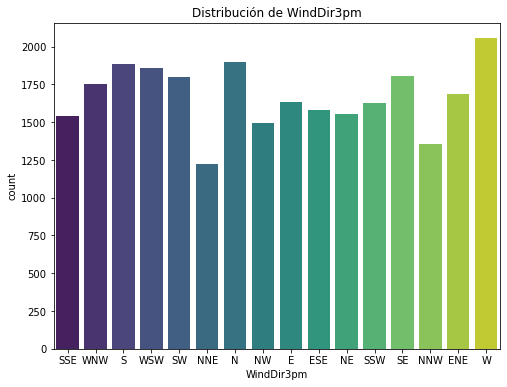

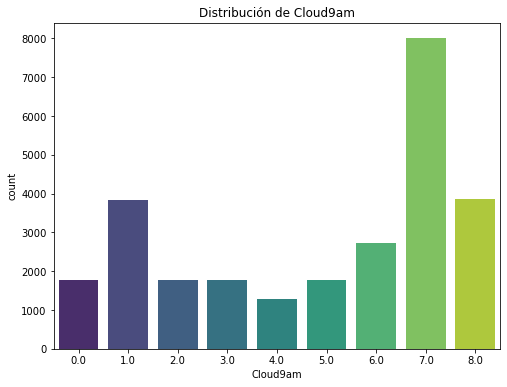

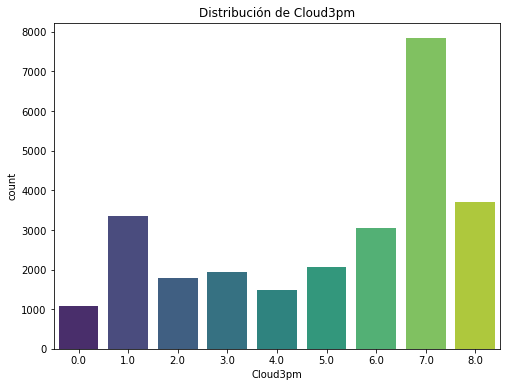

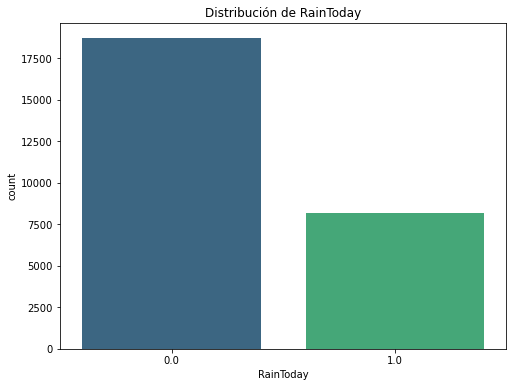

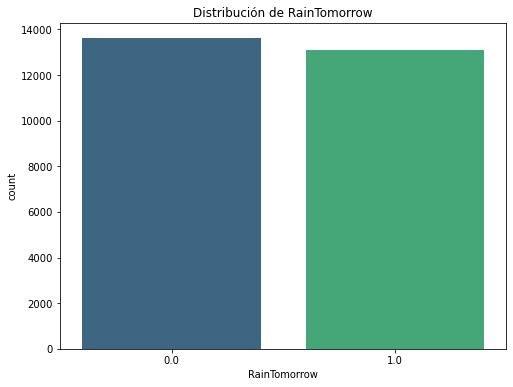

In [15]:
categorical_columns = rain_data.select_dtypes(include=['object']).columns
#also include 'Cloud9am' and 'Cloud3am' as categorical variable
categorical_columns = categorical_columns.append(pd.Index(['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']))

#Exclude the 'Date' column
categorical_columns = categorical_columns.drop('Date')

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=rain_data[column], palette="viridis")
    plt.title(f'Distribución de {column}')
    plt.show()


## Correlation between variables

<AxesSubplot:>

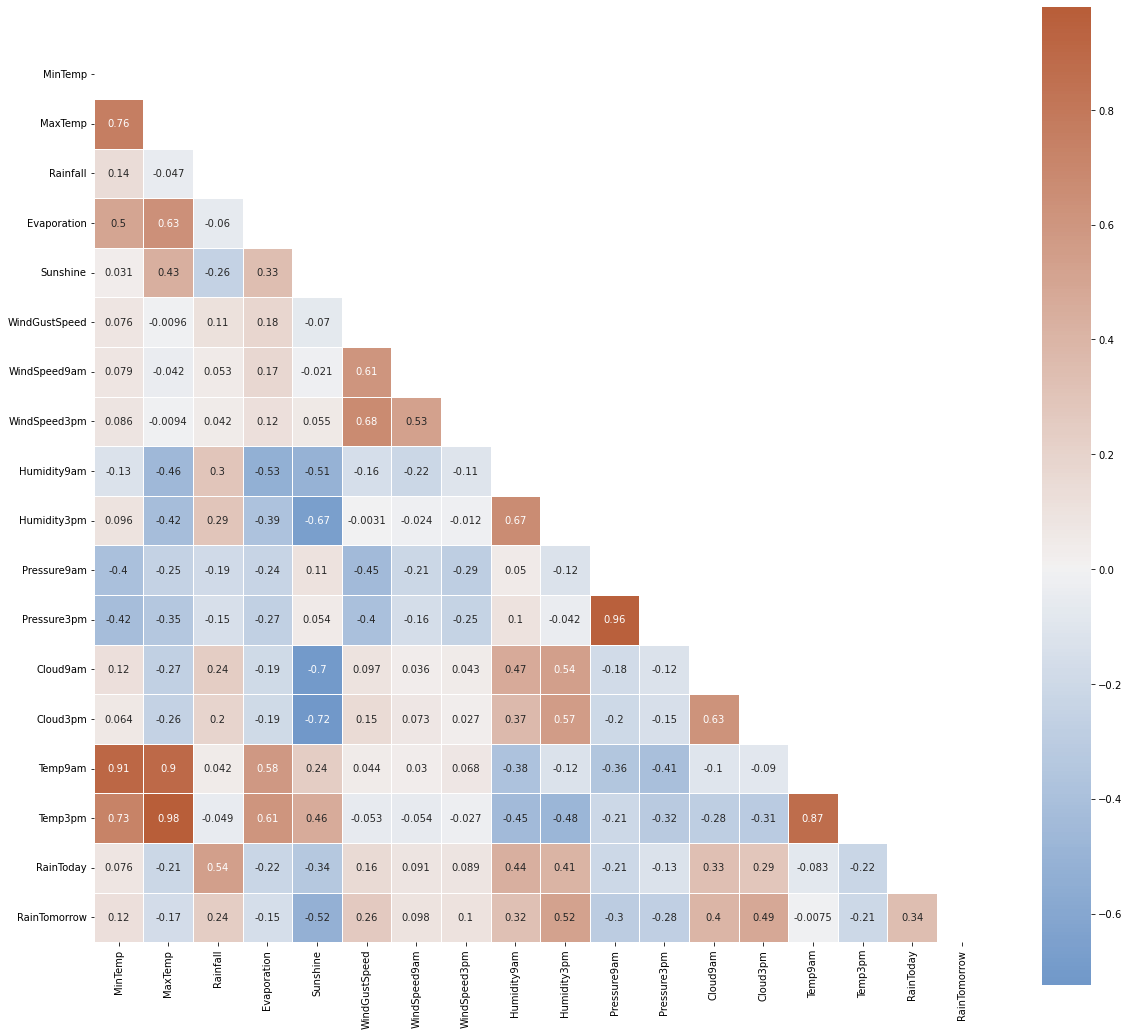

In [21]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = rain_data.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(correlation_matrix))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Outliers